In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('data.csv')
display(data)

,PM2.5,PM10,So2,No2,Co,O3,AQI
0,150,207,69,106,2.01,28,208
1,179,252,88,110,2.37,19,221
2,174,226,63,83,1.72,30,217
3,110,181,71,86,1.60,21,146
4,146,211,88,91,2.15,27,191
...,...,...,...,...,...,...,...
2962,33,79,9,41,0.78,46,65
2963,36,87,10,35,0.81,70,69
2964,22,42,11,31,0.80,72,42
2965,36,70,11,58,1.17,27,60


In [3]:
X = data.iloc[:,:-1]
display(X)

bins = [0, 50, 100, 150, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy']

Y = pd.cut( x = data['AQI'], bins = bins, labels = labels)
display(Y.shape)


,PM2.5,PM10,So2,No2,Co,O3
0,150,207,69,106,2.01,28
1,179,252,88,110,2.37,19
2,174,226,63,83,1.72,30
3,110,181,71,86,1.60,21
4,146,211,88,91,2.15,27
...,...,...,...,...,...,...
2962,33,79,9,41,0.78,46
2963,36,87,10,35,0.81,70
2964,22,42,11,31,0.80,72
2965,36,70,11,58,1.17,27


(2967,)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

y_train = y_train.cat.codes
y_test = y_test.cat.codes

# Norminalization
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

y_train_one = to_categorical(y_train, 4)
y_test_one = to_categorical(y_test, 4)



In [5]:
model = keras.Sequential()
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer='SGD', metrics = ['accuracy'])

In [6]:
history = model.fit(x_train, y_train_one, epochs=100, batch_size = 16, verbose = 2, validation_data=(x_test, y_test_one))

Epoch 1/100
149/149 - 0s - 3ms/step - accuracy: 0.5461 - loss: 1.0958 - val_accuracy: 0.5892 - val_loss: 0.9127
Epoch 2/100
149/149 - 0s - 526us/step - accuracy: 0.7307 - loss: 0.7748 - val_accuracy: 0.8030 - val_loss: 0.6587
Epoch 3/100
149/149 - 0s - 514us/step - accuracy: 0.8251 - loss: 0.5798 - val_accuracy: 0.8451 - val_loss: 0.4965
Epoch 4/100
149/149 - 0s - 508us/step - accuracy: 0.8546 - loss: 0.4566 - val_accuracy: 0.8737 - val_loss: 0.3970
Epoch 5/100
149/149 - 0s - 597us/step - accuracy: 0.8803 - loss: 0.3777 - val_accuracy: 0.8805 - val_loss: 0.3416
Epoch 6/100
149/149 - 0s - 490us/step - accuracy: 0.8921 - loss: 0.3278 - val_accuracy: 0.8754 - val_loss: 0.3226
Epoch 7/100
149/149 - 0s - 489us/step - accuracy: 0.9048 - loss: 0.2920 - val_accuracy: 0.9091 - val_loss: 0.2689
Epoch 8/100
149/149 - 0s - 488us/step - accuracy: 0.9111 - loss: 0.2654 - val_accuracy: 0.9057 - val_loss: 0.2478
Epoch 9/100
149/149 - 0s - 491us/step - accuracy: 0.9195 - loss: 0.2436 - val_accuracy: 0.

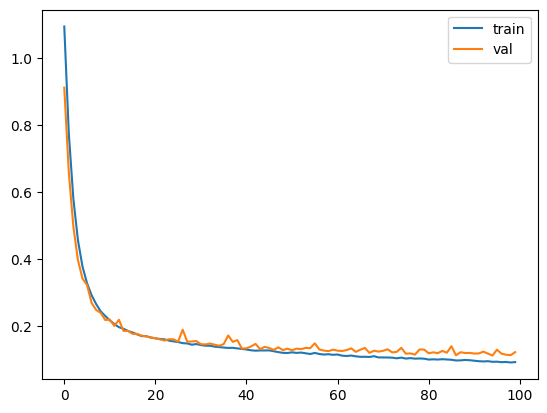

In [7]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()
plt.show()

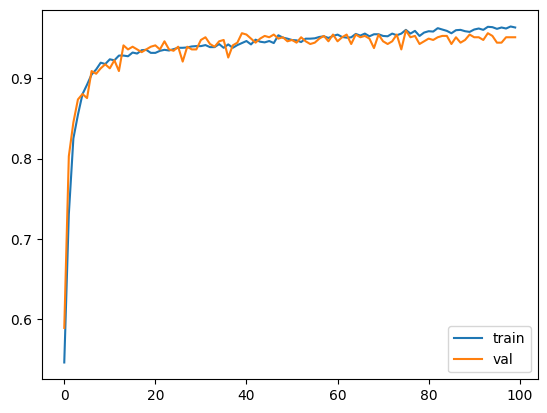

In [8]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.legend()
plt.show()

In [9]:
pre_y = model.predict(x_test)
display(pre_y)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[1.2033758e-02, 9.8745245e-01, 5.1233068e-04, 1.4909033e-06],
       [5.6738941e-07, 9.9999928e-01, 8.9983871e-08, 3.0365991e-11],
       [9.9997836e-01, 2.1695621e-05, 2.8701332e-12, 2.8647147e-11],
       ...,
       [4.6958794e-05, 9.9960989e-01, 3.4308509e-04, 9.0730772e-08],
       [1.0935801e-06, 2.2464395e-01, 7.7535433e-01, 6.2474538e-07],
       [5.1817239e-07, 9.7639149e-01, 2.3608053e-02, 2.4313493e-08]],
      shape=(594, 4), dtype=float32)

In [10]:
y_pre = np.argmax(pre_y, axis = 1)

In [11]:
report = classification_report(y_test, y_pre)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       144
           1       0.95      0.96      0.96       302
           2       0.94      0.94      0.94       106
           3       0.93      1.00      0.97        42

    accuracy                           0.95       594
   macro avg       0.95      0.96      0.95       594
weighted avg       0.95      0.95      0.95       594

